In [29]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# 데이터 불러오기

In [2]:
df_train = pd.read_csv('energy/train.csv', encoding='cp949')
df_test = pd.read_csv('energy/test.csv', encoding='cp949')

In [3]:
train = df_train.copy()
test = df_test.copy()

In [4]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [5]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 전처리

### 컬럼 이름 변경

In [6]:
cols = ["num", "date_time", "energy", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]
cols2 = ["num", "date_time", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]


train.columns = cols
test.columns = cols2

In [7]:
train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [8]:
test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 결측치 처리

In [9]:
train.isnull().sum()

num              0
date_time        0
energy           0
temp             0
windspeed        0
humidity         0
precipitation    0
sun              0
cooler           0
solar            0
dtype: int64

In [10]:
test.isnull().sum()

num                 0
date_time           0
temp             6720
windspeed        6720
humidity         6720
precipitation    8400
sun              6720
cooler           7784
solar            8456
dtype: int64

### test 데이터에 한해서 결측치 처리 진행

- **수치형 데이터 결측치 처리**

분석 데이터가 시계열데이터이기 때문에 단순히 특정 값을 대입하기보다 
    
해당 결측치의 앞, 뒤 값에 선형적으로 비례하는 **interpolate 함수**를 사용하여 수치형 데이터 컬럼의 결측치를 처리했다.

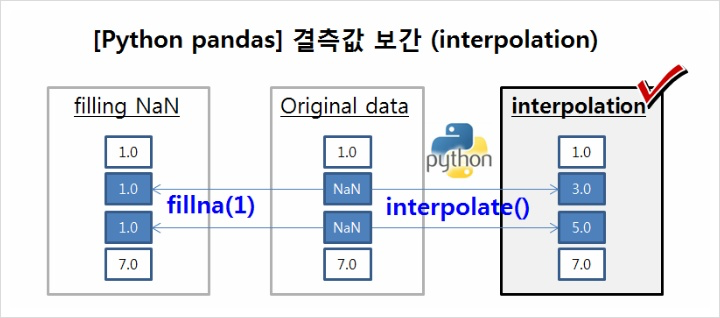

In [13]:
test['temp'] = test['temp'].interpolate(method='linear')

test['windspeed'] = test['windspeed'].interpolate(method='linear')

test['humidity'] = test['humidity'].interpolate(method='linear')

test['precipitation'] = test['precipitation'].interpolate(method='linear')

test['sun'] = test['sun'].interpolate(method='linear')

pd.options.display.float_format = '{:.2f}'.format

In [14]:
test.isnull().sum()

num                 0
date_time           0
temp                0
windspeed           0
humidity            0
precipitation       0
sun                 0
cooler           7784
solar            8456
dtype: int64

- **범주형 데이터 결측치 처리**

cooler(비전기냉방시설), solar(태양광보유) 컬럼의 경우 범주형 데이터이며 결측치를 제외한 모든 값은 1이다.

이는 해당 시설이 존재할 경우 1이며, 존재하지 않을 경우 결측치로 입력되어있는 것으로 유추할 수 있고,
  
따라서 **결측치를 0**으로 처리했다.

In [16]:
test = test.fillna(0)

In [17]:
test.isnull().sum()

num              0
date_time        0
temp             0
windspeed        0
humidity         0
precipitation    0
sun              0
cooler           0
solar            0
dtype: int64

In [18]:
test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.0,0.0,0.0
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.0,0.0,0.0
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.0,0.0,0.0
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.0,0.0,0.0


# 시간 데이터

- date_time 컬럼 datetime으로 type 변환

In [19]:
train["date_time"] = pd.to_datetime(train["date_time"])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num            122400 non-null  int64         
 1   date_time      122400 non-null  datetime64[ns]
 2   energy         122400 non-null  float64       
 3   temp           122400 non-null  float64       
 4   windspeed      122400 non-null  float64       
 5   humidity       122400 non-null  float64       
 6   precipitation  122400 non-null  float64       
 7   sun            122400 non-null  float64       
 8   cooler         122400 non-null  float64       
 9   solar          122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


In [22]:
train["date"] = train["date_time"].dt.date # 전체 날짜
train["month"] = train["date_time"].dt.month # 월
train["day"] = train["date_time"].dt.day # 일
train["hour"] = train["date_time"].dt.hour
train["weekday"] = train["date_time"].dt.weekday # 0: 월요일
train["weekend"] = train["weekday"].isin([5, 6]).astype(int) # 5: 토요일

train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,2020-06-01,6,1,0,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,2020-06-01,6,1,1,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,6,1,2,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,6,1,3,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,2020-06-01,6,1,4,0,0


In [ ]:
test["date_time"] = pd.to_datetime(test["date_time"])

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   num            10080 non-null  int64         
 1   date_time      10080 non-null  datetime64[ns]
 2   temp           10080 non-null  float64       
 3   windspeed      10080 non-null  float64       
 4   humidity       10080 non-null  float64       
 5   precipitation  10080 non-null  float64       
 6   sun            10080 non-null  float64       
 7   cooler         10080 non-null  float64       
 8   solar          10080 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 708.9 KB


In [23]:
test["date"] = test["date_time"].dt.date # 전체 날짜
test["month"] = test["date_time"].dt.month # 월
test["day"] = test["date_time"].dt.day # 일
test["hour"] = test["date_time"].dt.hour
test["weekday"] = test["date_time"].dt.weekday # 0: 월요일
test["weekend"] = test["weekday"].isin([5, 6]).astype(int) # 5: 토요일

test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.0,0.0,0.0,2020-08-25,8,25,0,1,0
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.0,0.0,0.0,2020-08-25,8,25,1,1,0
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.0,0.0,0.0,2020-08-25,8,25,2,1,0
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.0,0.0,0.0,2020-08-25,8,25,3,1,0
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.0,0.0,0.0,2020-08-25,8,25,4,1,0


# Feature Engineering

## 불쾌지수

### 1.8$T$ − 0.55(1−$RH$)(1.8$T$−26) + 32

$T$=기온(°C), $RH$=상대습도(%)

- 기온과 습도의 조합으로 사람이 느끼는 온도를 표현한 것으로 온습도지수(THI)
- 불쾌지수는 복사나 바람의 조건은 포함되어 있지 않기 때문에 그 적정한 사용에는 한계가 있다.
- **해당 데이터가 여름철 데이터인만큼 실내 전력사용량과 관련이 있을 것**이라고 판단

In [24]:
train['THI'] = 1.8*train['temp'] - 0.55*(1-(train['humidity']/100))*(1.8*train['temp']-26) + 32
test['THI'] = 1.8*test['temp'] - 0.55*(1-(test['humidity']/100))*(1.8*test['temp']-26) + 32

## 체감온도

### 13.12 + 0.6125$T$ − 13.947$V^{0.16}$ + 0.486$T$$V^{0.16}$ 

$T$=기온(°C), $V$=풍속(m/s)

- 체감온도는 불쾌지수에서 포함하지 않은 **바람의 조건을 포함**하고 있어 보완해주는 변수

In [25]:
train['sensible'] = 13.12+0.6215*train['temp']-13.947*train['windspeed']**0.16+0.486*train['temp']*train['windspeed']**0.16
test['sensible'] = 13.12+0.6215*test['temp']-13.947*test['windspeed']**0.16+0.486*test['temp']*test['windspeed']**0.16

## CDH (Cooling Dgree Hour)

∑(일평균기온－24(°C))

- 일평균기온이 기준 온도보다 높은 날들의 일평균기온과 기준 온도와의 차를 구하여 매일 매일 누적 합산한 것
- 냉방 수요에 대한 설명력이 높은 변수이기 때문에 추가

In [ ]:
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,61,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
    
train['CDH'] = cdhs

# 건물별 분석 ( 기온 ~ 일조량)

In [50]:
train

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend,THI,sensible,dayofyear
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,2020-06-01,6,1,0,0,0,63.43008,17.813392,153
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,2020-06-01,6,1,1,0,0,63.56993,17.783091,153
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,6,1,2,0,0,63.22775,17.441102,153
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,6,1,3,0,0,62.54339,16.958337,153
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,2020-06-01,6,1,4,0,0,62.39760,16.803848,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,2020-08-24,8,24,19,0,0,77.80896,29.899318,237
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,2020-08-24,8,24,20,0,0,77.44917,29.387645,237
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,2020-08-24,8,24,21,0,0,77.44917,29.340774,237
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,2020-08-24,8,24,22,0,0,77.52246,29.109689,237


In [77]:
train.describe()

,num,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,month,day,hour,weekday,weekend,THI,sensible,dayofyear
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,6.929412,14.835294,11.500000,2.964706,0.282353,73.461061,25.937809,195.000000
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,0.793925,8.446192,6.922215,2.014351,0.450146,4.778330,3.869624,24.535789
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,52.344210,11.940653,153.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,5.750000,1.000000,0.000000,70.035960,23.173020,174.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,7.000000,15.000000,11.500000,3.000000,0.000000,73.615850,25.853987,195.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,8.000000,22.000000,17.250000,5.000000,1.000000,77.074510,28.458121,216.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,8.000000,31.000000,23.000000,6.000000,1.000000,86.661790,39.702642,237.000000


In [78]:
test.describe()

,num,temp,windspeed,humidity,precipitation,sun,cooler,solar,month,day,hour,weekday,weekend,THI,sensible,dayofyear
count,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.0,10080.000000,10080.00000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000
mean,30.500000,27.805813,2.440585,81.962500,2.191845,0.612917,0.227778,0.161111,8.0,28.000000,11.50000,3.000000,0.285714,79.447959,29.987426,241.000000
std,17.318961,2.275416,1.785098,11.467641,5.704649,0.867991,0.419419,0.367652,0.0,2.000099,6.92253,2.000099,0.451776,2.411122,2.626504,2.000099
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,8.0,25.000000,0.00000,0.000000,0.000000,71.780000,23.985342,238.000000
25%,15.750000,26.133333,1.200000,74.666667,0.000000,0.000000,0.000000,0.000000,8.0,26.000000,5.75000,1.000000,0.000000,77.881755,28.092609,239.000000
50%,30.500000,27.466667,2.100000,83.000000,0.000000,0.100000,0.000000,0.000000,8.0,28.000000,11.50000,3.000000,0.000000,79.214220,29.515183,241.000000
75%,45.250000,29.100000,3.175000,91.000000,1.500000,1.033333,0.000000,0.000000,8.0,30.000000,17.25000,5.000000,1.000000,81.019620,31.415817,243.000000
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.000000,1.000000,8.0,31.000000,23.00000,6.000000,1.000000,85.551900,38.983478,244.000000


### 건물들의 평균 전력 사용량

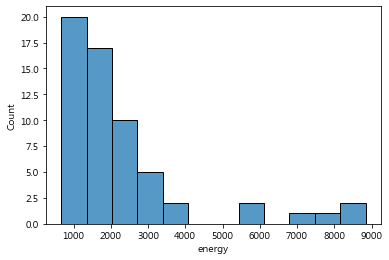

In [31]:
sns.histplot(train.groupby('num')['energy'].mean());

### 일별 평균 기온과 전력 사용량

In [41]:
#연 기준 며칠째인지
train['dayofyear'] = train.date_time.dt.dayofyear 
test['dayofyear'] = test.date_time.dt.dayofyear 

분석 데이터는 시계열 데이터이다. 이러한 시계열성(순차적인 데이터)을 시각화하기 위해 단순 날짜인 day보다

시간의 경과를 내포하고 있는 **dayofweek**을 사용해 데이터를 시각화하고자 한다.

- 6월 : 153 ~ 182

- 7월 : 183 ~ 213

- 8월 : 214 ~ 237

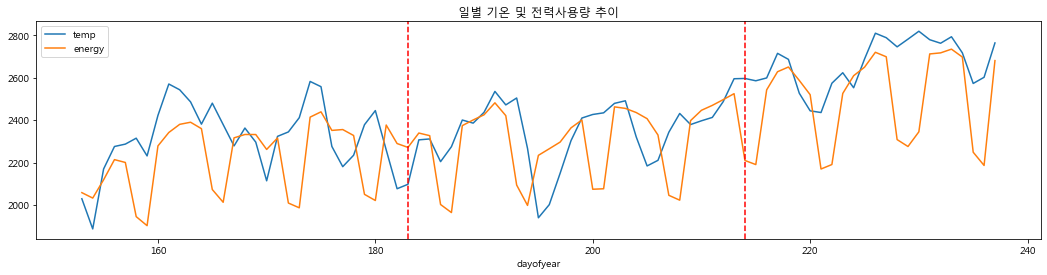

In [42]:
(train.groupby(['dayofyear'])['temp'].mean()*100).plot(figsize=(18, 4))
                                          # 왜 100을 곱하지????? -> 단위를 맞춰주려고
train.groupby(['dayofyear'])['energy'].mean().plot(figsize=(18, 4))
plt.legend(['temp', 'energy'])
plt.axvline(x = 183, color = 'r', linestyle = '--',)  # 7월 시작
plt.axvline(x = 214, color = 'r', linestyle = '--',)  # 8월 시작
plt.title('일별 평균 기온 및 전력사용량 추이')
plt.show()

빨간 점선 : 6, 7, 8월 구분

**7월 초순 이후로 꾸준히 상승하는 경향을 보이며, 일반적으로 전력 사용량은 기온과 비슷한 양상**을 보인다.

### 일별 평균 습도 및 기온 추이

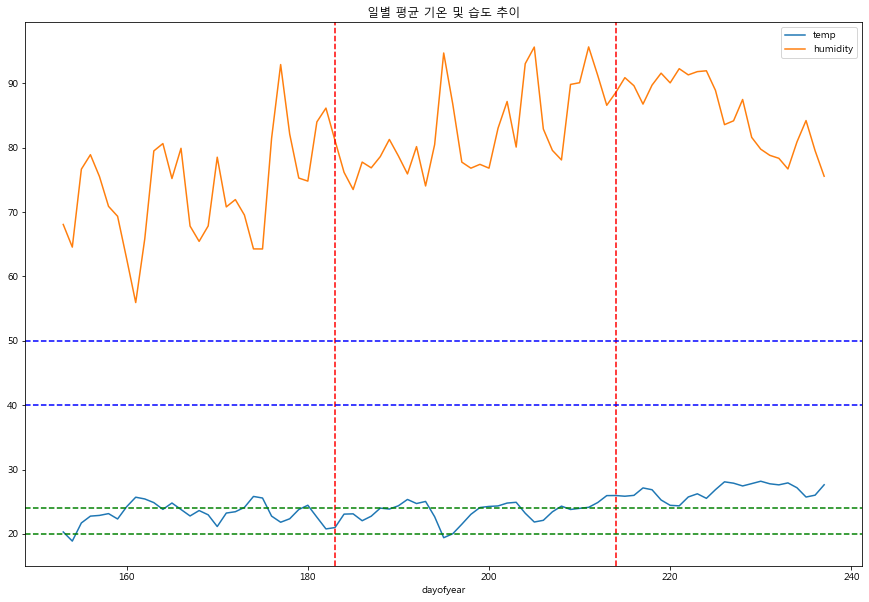

In [76]:
(train.groupby(['dayofyear'])['temp'].mean()).plot(figsize=(15, 10))
train.groupby(['dayofyear'])['humidity'].mean().plot(figsize=(15, 10))
plt.legend(['temp', 'humidity'])


plt.axvline(x = 183, color = 'r', linestyle = '--',)  # 7월 시작
plt.axvline(x = 214, color = 'r', linestyle = '--',)  # 8월 시작

plt.axhline(y = 20, color = 'g', linestyle = '--',)  # 20°C
plt.axhline(y = 24, color = 'g', linestyle = '--',)  # 24°C

plt.axhline(y = 40, color = 'b', linestyle = '--',)  # 40%
plt.axhline(y = 50, color = 'b', linestyle = '--',)  # 50%


plt.title('일별 평균 기온 및 습도 추이')
plt.show()

- 여름 적정 실내온도와 습도는? : https://www.korea.kr/news/healthView.do?newsId=148780861
 
위 기사에 따르면 쾌적함을 주는 습도는 온도에 따라 달라지는데,

15°C에서는 70%정도, 18-20°C에서는 60%, 21-23°C에서는 50%, 24°C이상에서는 40%가 적당한 습도라고 한다.

실내 기준이지만, 사람이 쾌적함을 느낀다는 점에서 실외 온도, 습도에 대해서도 동일하게 적용할 수 있는 기준이라고 생각한다.

train 데이터에는 대체적으로 20-30°C 사이의 기온이다.

그렇다면 해당 기온에서는 40-50%의 습도가 적정 습도라고 볼 수 있는데,

그보다 한참 높은 평균 80% 정도의 습도가 형성되어 있다.

더불어 기온이 상승함에 따라 습도 또한 상승하는 양상을 보이므로 **습도가 증가하면 전력 사용량이 증가하는 양상**을 보일 것이라고 예측할 수 있다.


### 일별 강수량 추이

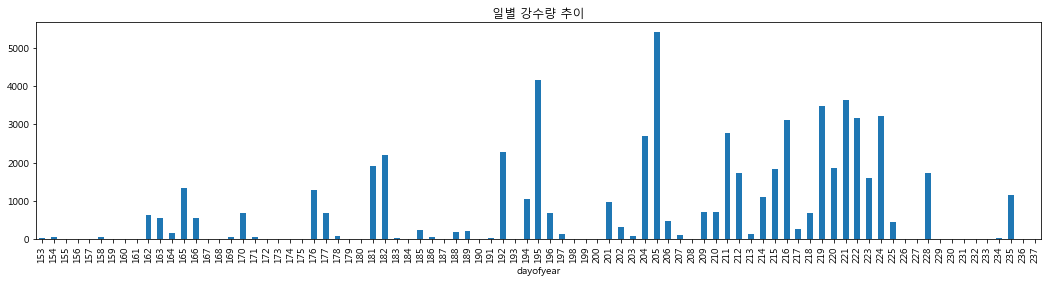

In [45]:
(train.groupby(['dayofyear'])['precipitation'].sum()).plot(kind='bar', figsize=(18, 4))
plt.title('일별 강수량 추이')
plt.show()

7월 말부터 8월 중순(204 ~ 224) 까지는 거의 매일 비가 내린 것을 알 수 있다.

### 일별 일조량 추이

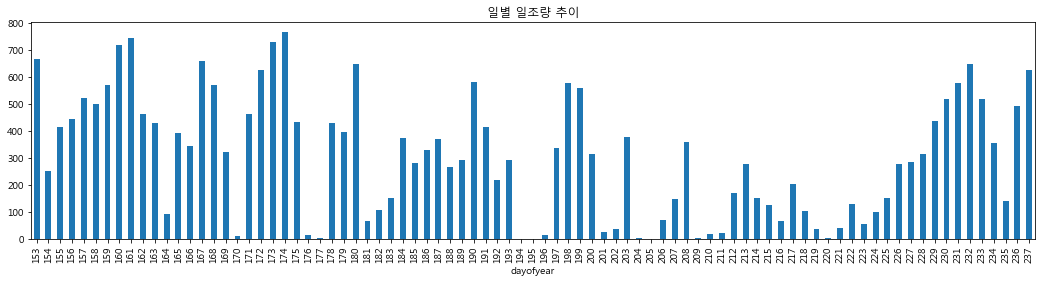

In [52]:
train.groupby(['dayofyear'])['sun'].sum().plot(kind='bar', figsize=(18, 4))
plt.title('일별 일조량 추이')
plt.show()

장마 시즌(204~224)에는 일조시간이 줄어들며, 6월과 8월 말에 높은 일조시간을 보이는 것을 알 수 있다.

이를 통해 강수량과 일조량은 음의 상관관계를 가지고 있을 것이라고 예상할 수 있다.

### 건물들의 요일별, 시간대별 전력 사용량

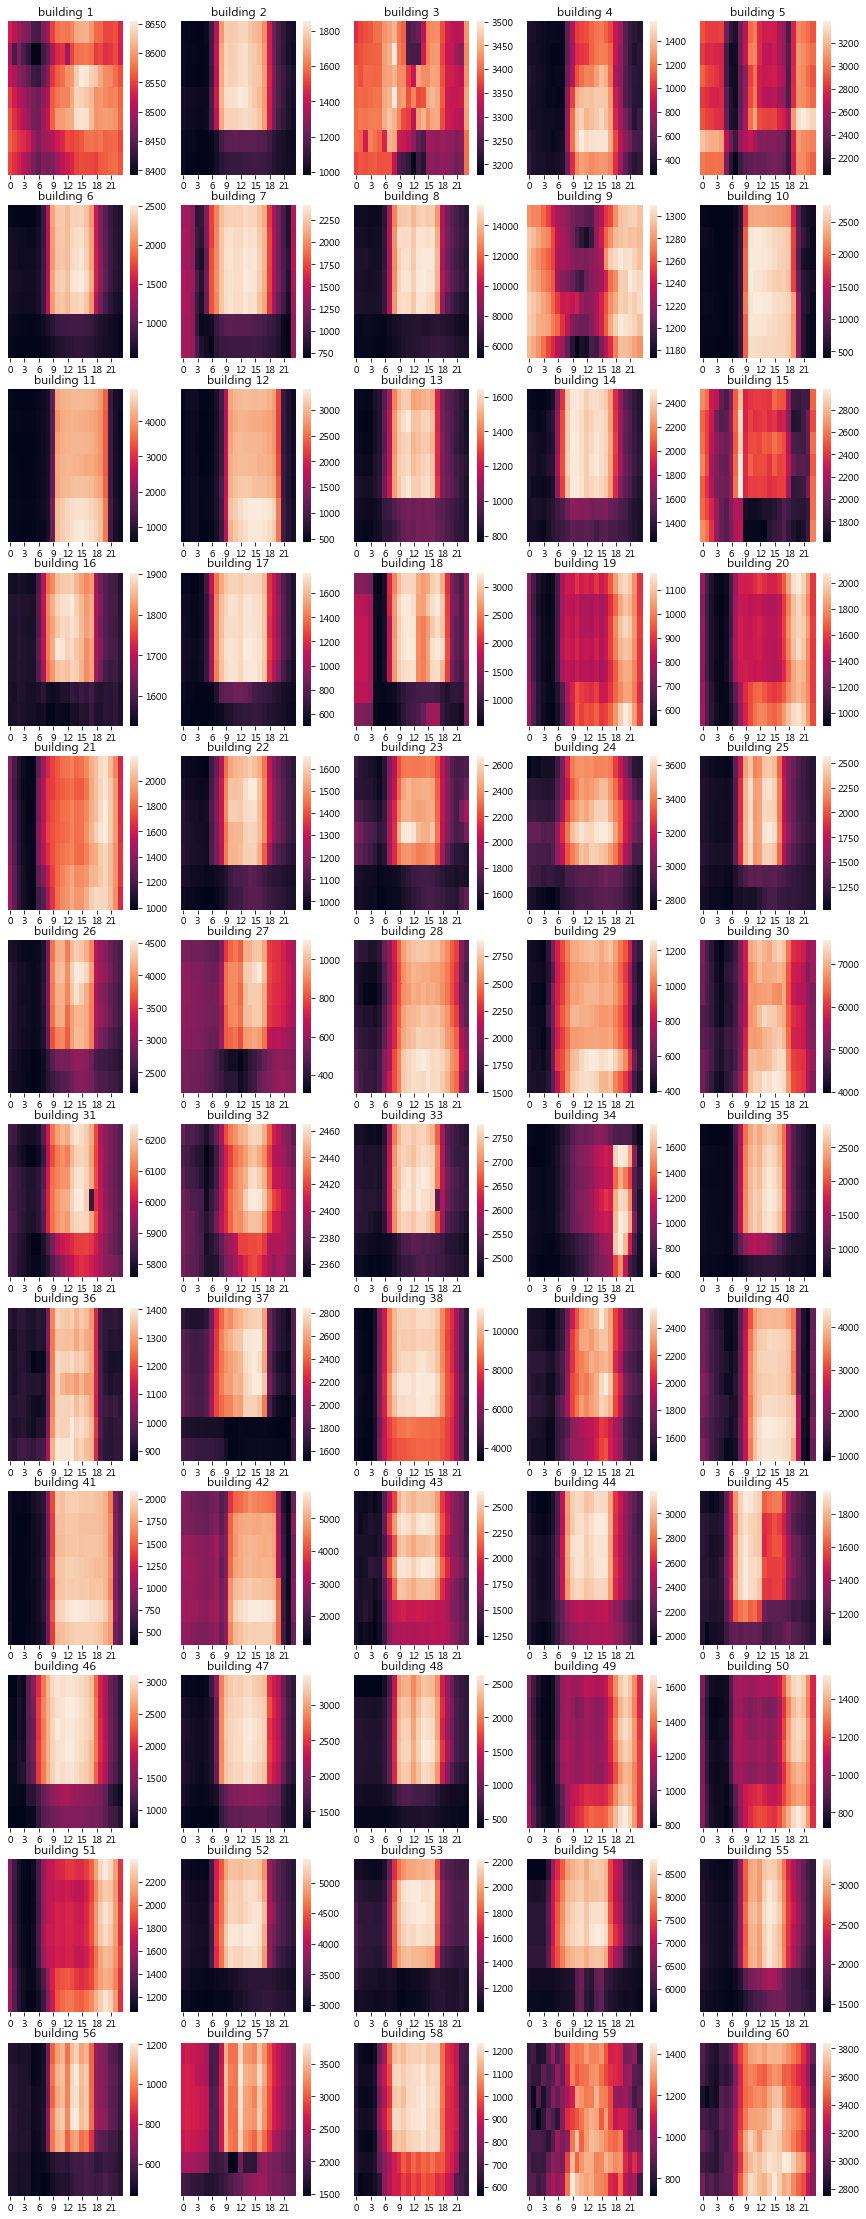

In [34]:
fig = plt.figure(figsize = (15, 40))
for num in train['num'].unique():
    df = train[train.num == num]
    df = df.groupby(['weekday', 'hour'])['energy'].mean().reset_index().pivot('weekday', 'hour', 'energy')
    plt.subplot(12, 5, num)
    sns.heatmap(df)
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

건물별로 상이한 패턴이 보이는데, 대표적으로 두 가지 패턴이 보임.

- 평일 낮에만 전력사용량이 높은 건물


- 평일 주말 상관없이 낮에만 전력사용량이 높은 건물

6월, 7월보다 8월 말로 갈수록 더욱 기온은 높아집니다.

기온이 높아짐에 따라 전력 사용량도 같이 높아지는 경향을 보입니다.

7월 말부터 장마의 영향을 받으며 비내리는 날이 많아집니다.

8월 말에는 장마가 끝나며, 비가 오는 날이 거의 없습니다.

일조 시간은 6월에 가장 높았고, 장마 시즌에 줄어들었으며, 8월에 다시 오르고 있습니다.